# Réalisation de la méthode des kmeans

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)

# Define x & y dataset
y = df_["Potability_det"]
x = df_.drop(["Potability_det"], axis=1)

mean = x.mean(axis=0)
x = x-mean

scaler = StandardScaler()

x_normalized = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# De 1 à 500 voisins (exclu), échelle logarithmique
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int))
param_grid = {"n_neighbors": n_neighbors_list}

"""cls = KNeighborsClassifier()
search = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10)
search.fit(x_normalized, y)
print("Meilleurs paramètres :", search.best_params_)"""

'cls = KNeighborsClassifier()\nsearch = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10)\nsearch.fit(x_normalized, y)\nprint("Meilleurs paramètres :", search.best_params_)'

In [15]:
from sklearn.model_selection import cross_val_score

cls = KNeighborsClassifier(n_neighbors=16)
scores = cross_val_score(cls, x_normalized, y, cv=5)
print(scores.mean())

0.8486647448887366


Pourquoi la normalisation et le centrage sont-ils importants pour KNN ?
L'algorithme KNN se base sur des mesures de distance (comme la distance euclidienne) pour trouver les voisins les plus proches. Si les caractéristiques ne sont pas normalisées :

Les caractéristiques avec des valeurs plus grandes peuvent dominer la mesure de distance.
Cela peut conduire à une mauvaise performance de l'algorithme, car la distance sera biaisée en faveur de certaines caractéristiques.
En centrant et en normalisant les données, on s'assure que chaque caractéristique contribue de manière équitable à la mesure de distance, ce qui améliore la performance et la précision de l'algorithme KNN.

In [4]:
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability_det', 'Unnamed: 0'], axis=1)

# Define x & y dataset
y = df_["Potability"]
x = df_.drop(["Potability"], axis=1)

mean = x.mean(axis=0)
x = x-mean

scaler = StandardScaler()

x_normalized = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# De 1 à 500 voisins (exclu), échelle logarithmique
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int))
param_grid = {"n_neighbors": n_neighbors_list}

"""cls = KNeighborsClassifier()
search = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10)
search.fit(x_normalized, y)
print("Meilleurs paramètres :", search.best_params_)"""

cls = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(cls, x_normalized, y, cv=5)
print(scores.mean())

0.6493735194223249


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assurez-vous que le DataFrame 'df' est déjà chargé avec vos données

# Séparation des caractéristiques (X) et de la variable cible (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle RandomForest
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble d'entraînement
y_train_pred = model.predict(X_train)

# Calcul de l'exactitude sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on training set: {train_accuracy}')

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy on test set: {accuracy}')
print(f'Precision on test set: {precision}')
print(f'Recall on test set: {recall}')
print(f'F1 Score on test set: {f1}')

# Cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation mean accuracy: {cross_val_scores.mean()}')
print(f'Cross-validation standard deviation: {cross_val_scores.std()}')


Accuracy on training set: 0.7955288985823337
Accuracy on test set: 0.6274509803921569
Precision on test set: 0.6729031235135565
Recall on test set: 0.6274509803921569
F1 Score on test set: 0.5603366584811648
Cross-validation mean accuracy: 0.6572128511763754
Cross-validation standard deviation: 0.011119932003816882


Accuracy of LDA: 57.08%
Matrice de confusion:
[[261   0]
 [197   1]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       261
           1       1.00      0.01      0.01       198

    accuracy                           0.57       459
   macro avg       0.78      0.50      0.37       459
weighted avg       0.76      0.57      0.42       459



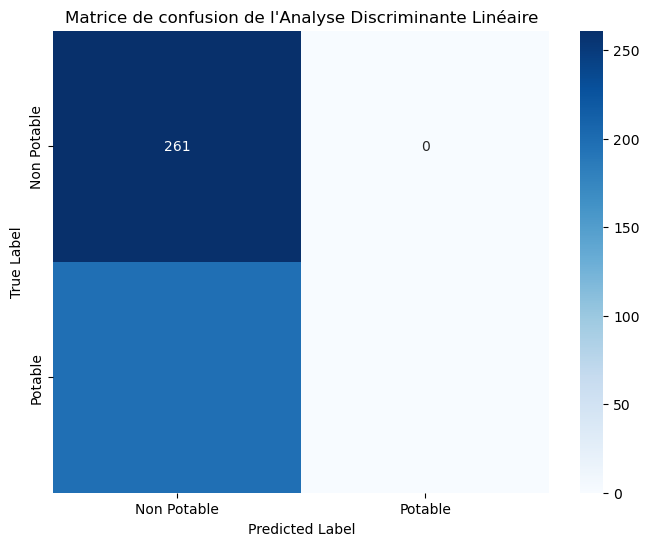

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sélectionner les variables d'origine
X = df.drop('Potability', axis=1)
y = df['Potability']

# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lda)

# Afficher l'accuracy en pourcentage
print(f'Accuracy of LDA: {accuracy * 100:.2f}%')

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_lda)
print("Matrice de confusion:")
print(conf_matrix)

# Calculer et afficher le rapport de classification
class_report = classification_report(y_test, y_pred_lda)
print("Rapport de classification:")
print(class_report)

# Afficher la matrice de confusion de manière visuelle
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Potable', 'Potable'], yticklabels=['Non Potable', 'Potable'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de confusion de l\'Analyse Discriminante Linéaire')
plt.show()


In [10]:
y

0       0
1       0
2       1
3       1
4       0
       ..
2288    0
2289    0
2290    0
2291    0
2292    1
Name: Potability, Length: 2293, dtype: int64

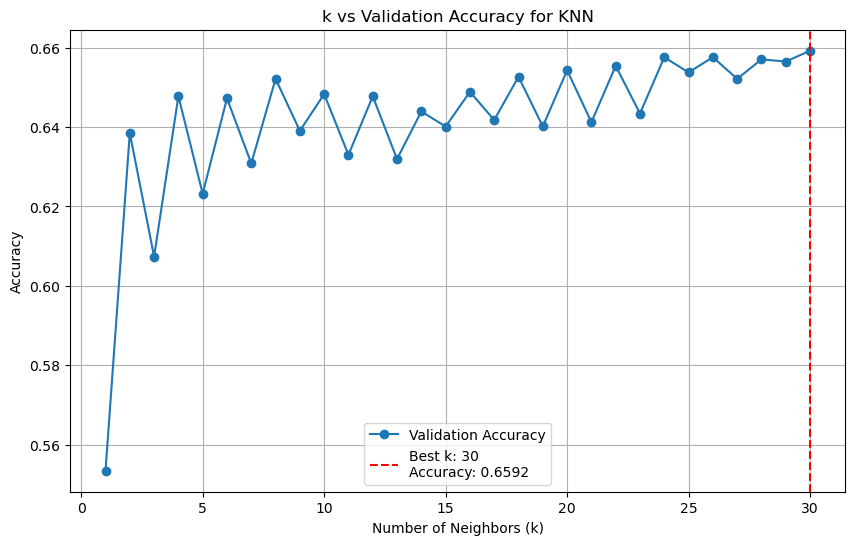

Test set accuracy: 0.6471


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)
# Assuming df_ is your DataFrame and is already loaded
y = df_["Potability_det"]
X = df_.drop(["Potability_det"], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0., random_state=42)

# Define the range of k (number of neighbors)
k_values = range(1, 31)
val_scores = []

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    val_score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy').mean()
    val_scores.append(val_score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_scores, label='Validation Accuracy', marker='o')
plt.axvline(x=k_values[np.argmax(val_scores)], linestyle='--', color='red', 
            label=f'Best k: {k_values[np.argmax(val_scores)]}\nAccuracy: {max(val_scores):.4f}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k vs Validation Accuracy for KNN')
plt.legend()
plt.grid(True)
plt.show()

# Train the best model
best_k = k_values[np.argmax(val_scores)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the best model on the test set
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.4f}")


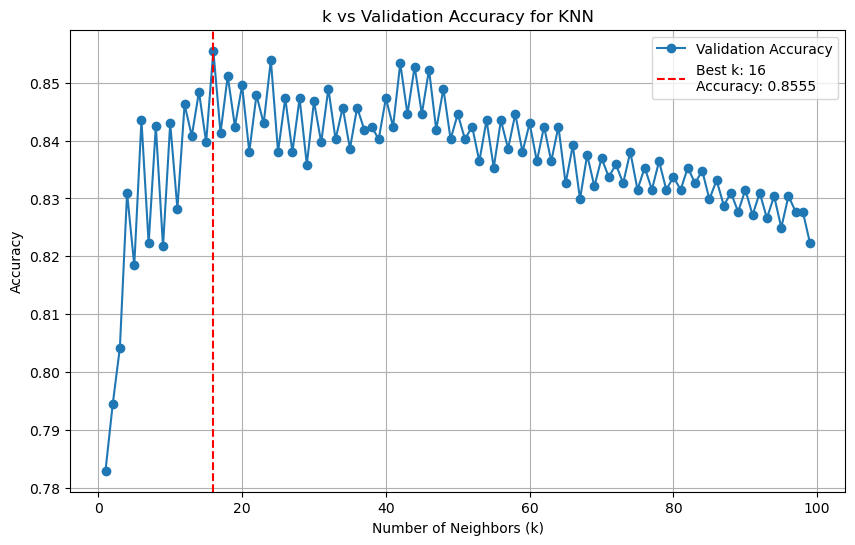

Test set accuracy: 0.8322


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Chargement des données
df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)

# Séparation des caractéristiques (X) et de la variable cible (y)
y = df_["Potability_det"]
X = df_.drop(["Potability_det"], axis=1)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Définition de la plage de k (nombre de voisins)
k_values = range(1, 100)
val_scores = []

# Validation croisée pour chaque k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_normalized, y_train, cv=10, scoring='accuracy')
    val_scores.append(scores.mean())

# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_scores, label='Validation Accuracy', marker='o')
plt.axvline(x=k_values[np.argmax(val_scores)], linestyle='--', color='red', 
            label=f'Best k: {k_values[np.argmax(val_scores)]}\nAccuracy: {max(val_scores):.4f}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k vs Validation Accuracy for KNN')
plt.legend()
plt.grid(True)
plt.show()

# Entraînement du meilleur modèle
best_k = k_values[np.argmax(val_scores)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_normalized, y_train)

# Évaluation du meilleur modèle sur l'ensemble de test
test_accuracy = best_knn.score(X_test_normalized, y_test)
print(f"Test set accuracy: {test_accuracy:.4f}")
